# Arbeidskrav 6: partielle differensialligninger

Finn Neumannbetingelsene for den konstruerte løsningen til diffusjonsligningen i Eksempler_06. For å gjøre dette må du beregne hva den deriverte av den konstruerte løsningen faktisk er i randpunktene $x = 0$ og $x = 1$.

$$ u(x,t)=t^2 + 4x^3 $$

$$\frac{\partial u_0}{\partial x} = 12(0)^2 = 0$$

$$\frac{\partial u_1}{\partial x} = 12(1)^2 = 12$$



Implementer eksplisitt skjema for den konstruerte løsningen med forenklede Neumannbetingelser (se midt på s. 165 i læreboken). Dette innebærer å bruke en foroverdifferanse for den romlig deriverte på venstre rand ($x = 0$), og en bakoverdifferanse for den romlig deriverte på høyre rand ($x = 1$).

#Neumannbetingelse i $x_0$ 

foroverdifferanse:

$$\frac{\partial u_0}{\partial x} = \frac {u_{i+1}-u_{i}}{\Delta x} = 0$$


$$ u_i = u_{i+1} $$

$$ t^2 +4(1)^3 = t^2 + 4$$
#Neumannbetingelse i $x_1$ 

 bakoverdifferanse:

$$\frac{\partial u_1}{\partial x} = \frac {u_n-u_{n-1}}{\Delta x} = 12$$

$$ u_n = u_{n-1}+ 12 \Delta x $$

   $$ u_n= t^2 + 12\Delta x$$

Eksplisitt skjema:
$$
\begin{aligned}
\frac{u^{n + 1}_i - u^n_i}{\Delta t} &= \frac{u^n_{i + 1} - 2 u^n_i + u^n_{i - 1}}{\Delta x^2} + 2 t^n - 24 x_i \\
\Rightarrow \quad
u^{n + 1}_i &= u^n_i + \alpha(u^n_{i + 1} - 2 u^n_i + u^n_{i - 1}) + \Delta t (2 t^n - 24 x_i)
\end{aligned}
$$


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def konstruert_N(N_punkter, N_tider):
    delta_t = 1 / (N_tider - 1)
    delta_x = 1 / (N_punkter - 1)
    alpha = delta_t / delta_x**2
    x = np.linspace(0, 1, N_punkter)
    u = 4 * x**3
    for n in range(N_tider - 1):
        t = delta_t * (n + 1)
        u[1:-1] += alpha * (u[2:] - 2 * u[1:-1] + u[:-2]) + delta_t * (2 * t - 24 * x[1:-1])
        u[0] = u[1]
        u[-1] = 12*delta_x + u[-2]
    return x, u

def eksakt_N(x):
    return 1 + 4 * x**3

def feil_N(N_punkter, N_tider):
    x, u = konstruert(N_punkter, N_tider)
    u_e_N = eksakt_N(x)
    return np.sum(np.abs(u - u_e_N)) / N_punkter

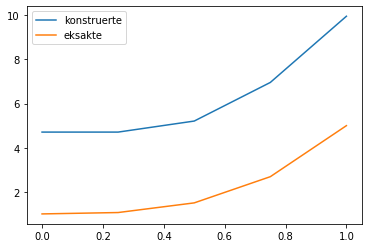

In [4]:
x, u = konstruert_N(5, 25)
plt.plot(x, u)
plt.plot(x, eksakt_N(x))
plt.legend(["konstruerte","eksakte"])

Gjennomfør en nøyaktighetsanalyse av skjemaet (som i Eksempler_06) og sammenlign med Dirichlet-løsningen fra Eksempler_06

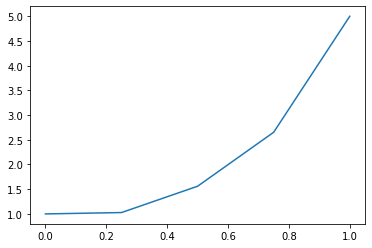

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def konstruert(N_punkter, N_tider):
    delta_t = 1 / (N_tider - 1)
    delta_x = 1 / (N_punkter - 1)
    alpha = delta_t / delta_x**2
    x = np.linspace(0, 1, N_punkter)
    u = 4 * x**3
    for n in range(N_tider - 1):
        t = delta_t * (n + 1)
        u[1:-1] += alpha * (u[2:] - 2 * u[1:-1] + u[:-2]) + delta_t * (2 * t - 24 * x[1:-1])
        u[0] = t**2 
        u[-1] = t**2 + 4
    return x, u

def eksakt(x):
    return 1 + 4 * x**3

def feil(N_punkter, N_tider):
    x, u = konstruert(N_punkter, N_tider)
    u_e = eksakt(x)
    return np.sum(np.abs(u - u_e)) / N_punkter

x, u = konstruert(5, 25)
plt.plot(x, u)

Gjør det samme for den mer nøyaktige implementasjonen av Neumannbetingelser (øverst på s. 165 i læreboken). Her benyttes sentrerte differanser for den romlig deriverte på randen ved å innføre kunstige punkter utenfor randen, $u_{-1}$ og $u_{N+1}$. Disse punktene kan så uttrykkes ved punktene innenfor randen ved å bruke randbetingelsen, og dermed blir det mulig å benytte skjemaet også for punktene på randen, hvilket ellers ikke er mulig.

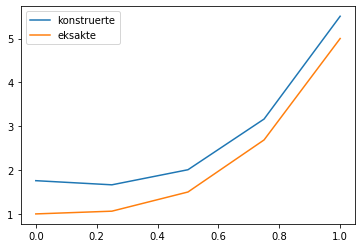

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def konstruert_N_S(N_punkter, N_tider):
    delta_t = 1 / (N_tider - 1)
    delta_x = 1 / (N_punkter - 1)
    alpha = delta_t / delta_x**2
    x = np.linspace(0, 1, N_punkter)
    u = 4 * x**3
    for n in range(N_tider - 1):
        t = delta_t * (n + 1)
        u[1:-1] += alpha * (u[2:] - 2 * u[1:-1] + u[:-2]) + delta_t * (2 * t - 24 * x[1:-1])
        u[0] += alpha * (u[1] - 2 * u[0] + u[1]) + delta_t * (2 * t - 24 * x[0])
        u[-1] += alpha * (u[-2] - 2 * u[-1] + 24*delta_x +u[-2]) + delta_t * (2 * t - 24 * x[-1])
    return x, u

def eksakt_N_S(x):
    return 1 + 4 * x**3

def feil_N_S(N_punkter, N_tider):
    x, u = konstruert_N_S(N_punkter, N_tider)
    u_e_N_S = eksakt_N(x)
    return np.sum(np.abs(u - u_e_N_S)) / N_punkter

x, u = konstruert_N_S(5, 25)
plt.plot(x, u)
plt.plot(x, eksakt_N_S(x))
plt.legend(["konstruerte","eksakte"])

Gjennomfør en nøyaktighetsanalyse av skjemaet og sammenlign med Dirichlet-løsningen fra Eksempler_06 og med den forenklede behandlingen av randverdiene over.

In [16]:
print("\nDirechlet\n")
n_punkter = 5
for n_tider in np.arange(50, 250, 50):
    E = feil(n_punkter, n_tider)
    print("%d\t%f\t%f\t%f" % (n_tider, E, E * n_tider, E * n_tider**2))


print("\nNEUMAN\n")
n_punkter = 5
for n_tider in np.arange(50, 250, 50):
    E = feil_N(n_punkter, n_tider)
    print("%d\t%f\t%f\t%f" % (n_tider, E, E * n_tider, E * n_tider**2))




Direchlet

50	0.001275	0.063774	3.188679
100	0.000631	0.063128	6.312799
150	0.000419	0.062916	9.437333
200	0.000314	0.062810	12.561968

NEUMAN

50	0.001275	0.063774	3.188679
100	0.000631	0.063128	6.312799
150	0.000419	0.062916	9.437333
200	0.000314	0.062810	12.561968
